Os 10 alunos com as médias mais altas foram:
0. a47-"MoisÃ©s JoÃ£o Cornelio"| "LEI"|18.0
1. a80-"Maria Carolina JosuÃ©"| "ENGFIS"|18.0
2. a32-"Ariane Sofia Foja"| "LEI"|17.5
3. a74-"VÃ¢nia Sofia Porfirio"| "ENGBIOM"|17.5
4. a56-"Hakeem BrazÃ£o"| "LEI"|17.25
5. a84-"LaudÃ¡rio FrasÃ£o"| "LCC"|17.0
6. a13-"Daniela PatrÃ­cia Montes"| "ENGBIOM"|16.75
7. a41-"Lachezar Rosas"| "ENGBIOM"|16.75
8. a45-"Imayame Hespanha"| "ENGFIS"|16.75
9. a2-"Igor AndrÃ© Cantanhede"| "ENGFIS"|16.5
{'"LEI"': 23, '"ENGFIS"': 32, '"ENGBIOM"': 25, '"LCC"': 20}
9 : 1
10 : 1
11 : 9
12 : 15
13 : 20
14 : 21
15 : 15
16 : 11
17 : 4


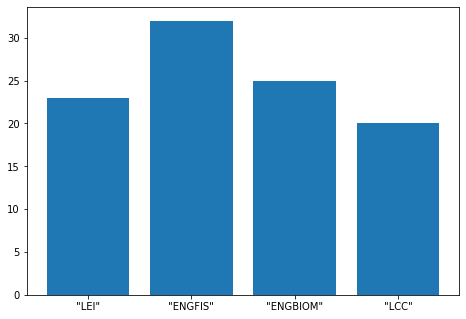

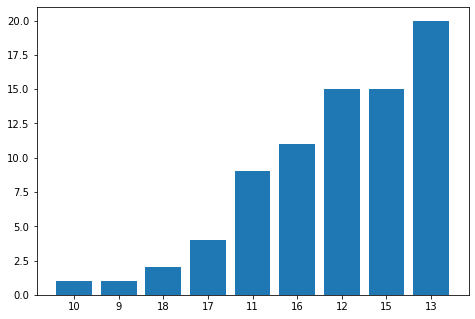

In [1]:
# Exercício 1: leitura do ficheiro - feita na aula prática 7
def lerDataset(fnome):
    bd = []
    f = open( fnome, encoding='utf-8')
    f.readline()
    for linha in f:
        novaLinha = linha.replace("\n","")
        campos = novaLinha.split(",")
        aluno = {}
        aluno['id'] = campos[0]
        aluno['nome'] = campos[1]
        aluno['curso'] = campos[2]
        listaTPC = []
        for tpc in campos[3:]:
            listaTPC.append(int(tpc))
        aluno['tpc'] = listaTPC
        bd.append(aluno)
    return bd


BDalunos=lerDataset ("alunos.txt")
#print (BDalunos)


#Exercício 2: listagem no monitor- feita na aula prática 7

def listarDataset(bd):
    print(" id | nome | curso | média")
    print("-------------------------")
    for a in bd:
        print(a["id"]+ "|" +a["nome"]+ "|" +a["curso"]+ "|" +str(sum(a["tpc"])/len(a["tpc"])))

#listarDataset(BDalunos)
        
#Exercício 3: Dado o id do aluno coloca a sua informação no monitor.
def ConsultarDataset(bd,numero):
    c=0
    for l in bd:
        if l["id"]==numero:
            print(l["id"]+ "|" +l["nome"]+ "|" +l["curso"]+ "|" +str(sum(l["tpc"])/len(l["tpc"])))
            c=1
    if c==0:
        print ("O registo não se encontra na base de dados.")
            

#Exercício 4: Top 10 médias mais altas: dá como resultado uma lista com os alunos com as 10 médias mais altas.
def chaveordenacao(l):
    return (sum(l["tpc"])/len(l["tpc"]))

def top10 (bd):
    bd.sort (key=chaveordenacao, reverse=True)
    print ("Os 10 alunos com as médias mais altas foram:")
    for i in range (10):
        print (str(i)+".", bd[i]["id"]+"-"+bd[i]["nome"]+"|", bd[i]["curso"] + "|" + str(sum(bd[i]["tpc"])/4))
top10(BDalunos)

#Exercício 5: Distribuição por Curso: dá como resultado uma lista de pares indicando quantos alunos há em cada curso- feita na aula prática 7
def distribPorCurso(bd):
    distribuicao = {}
    for a in bd:
        if a['curso'] in distribuicao.keys():
            distribuicao[a['curso']] = distribuicao[a['curso']] +1
        else:
            distribuicao[a['curso']] = 1
    return distribuicao
minhadistrib=distribPorCurso(BDalunos)
print (minhadistrib)

#Exercício 6: Distribuição por médias: dá como resultado uma lista de pares, média e nº de alunos com determinada média ( número inteiro) 
def distribPorMedias(bd):
    alunos=[]
    medias=[]
    l=[]
    for i in range (len(bd)-1):
        medias.append(int(sum(bd[i]["tpc"])/4))
    for r in range (20):
        if medias.count(r) > 0:
            alunos.append(str(r) + " : " + str(medias.count(r)))
    return alunos

al=distribPorMedias(BDalunos)
for i in range (len(al)-1):
    print(al[i]) 
    

#Exercício 7: Gráfico da distribuição por curso (através da função do exercício 5)
import matplotlib.pyplot as plt
def plotDistribPorCurso(bd):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    x=[]
    y=[]
    for i in bd:
        x.append(i)
        y.append (bd[i]) #numero de alunos do curso
    ax.bar(x,y)
    plt.show()

plotDistribPorCurso(distribPorCurso(BDalunos))


#Exercício 8: Gráfico da distribuição por médias (através da função do exercício 6)

def plotDistribPorMedias(bd):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    x=[]
    y=[]
    yx=[]
    for i in bd:
        alunos=i.split(" : ")
        yx.append([int(alunos[1]), alunos[0]])
    yx.sort()
    for r in range (len(yx)-1):
        y.append(yx[r][0])
        x.append(yx[r][1])
    ax.bar(x,y)
    plt.show()
    
plotDistribPorMedias(distribPorMedias(BDalunos))